### Simulação complexo-enzima-substrato ao longo do tempo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
#Concentração inicial e velocidade de reação
data = {
    'index': ['c_inicial', 'vel_reac'],
    'enzima': [2, .01],
    'substrato': [2, .005],
    'complexo': [0, .001],
    'produto': [0, .0005]
}
df_start = pd.DataFrame(data)
df_start.set_index('index', inplace=True)
print(df_start)

# Parâmetros iniciais
ca = df_start.loc['c_inicial', 'enzima']
cb = df_start.loc['c_inicial', 'substrato']
cc = df_start.loc['c_inicial', 'complexo']
cd = df_start.loc['c_inicial', 'produto']

k1 = df_start.loc['vel_reac', 'enzima']
k2 = df_start.loc['vel_reac', 'substrato']
k3 = df_start.loc['vel_reac', 'complexo']
k4 = df_start.loc['vel_reac', 'produto']

# Regras de integração
num_steps = 300001  # Por exemplo, de 0 a 200 com incremento de 0.01
dt = 0.01


           enzima  substrato  complexo  produto
index                                          
c_inicial    2.00      2.000     0.000   0.0000
vel_reac     0.01      0.005     0.001   0.0005


In [67]:
# Preparar arrays para armazenar resultados
ca_vals = np.zeros(num_steps)
cb_vals = np.zeros(num_steps)
cc_vals = np.zeros(num_steps)
cd_vals = np.zeros(num_steps)

# Inicializar os valores iniciais
ca_vals[0] = ca
cb_vals[0] = cb
cc_vals[0] = cc
cd_vals[0] = cd

# Aplicar o método de Euler
stationary_count = 0
for i in range(1, num_steps):
    dcadt = -k1 * ca * cb + k2 * cc + k3 * cc - k4 * ca * cd
    dcbdt = -k1 * ca * cb + k2 * cc
    dccdt = k1 * ca * cb - k2 * cc - k3 * cc + k4 * ca * cd
    dcddt = k3 * cc - k4 * ca * cd
    
    # Atualizar valores
    ca += dcadt * dt
    cb += dcbdt * dt
    cc += dccdt * dt
    cd += dcddt * dt
    
    # Armazenar valores atualizados
    ca_vals[i] = ca
    cb_vals[i] = cb
    cc_vals[i] = cc
    cd_vals[i] = cd

# Criar DataFrame com os resultados
result_df = pd.DataFrame({
    'enzima': ca_vals,
    'substrato': cb_vals,
    'complexo': cc_vals,
    'produto': cd_vals
}, index=np.arange(0, num_steps*dt, dt))


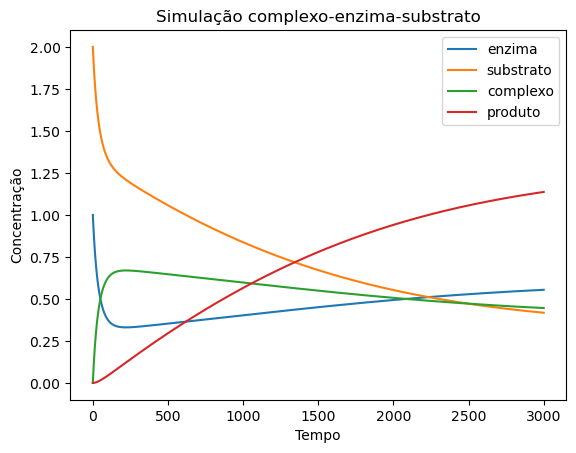

In [68]:
#Plot
result_df.plot()
plt.title('Simulação complexo-enzima-substrato')
plt.ylabel('Concentração')
plt.xlabel('Tempo')
plt.show()